# 4.1 Intro to Linear Regression

Welcome to the practical section of module 4.1, here we'll explore how to use python to implement a simple linear regression model. We'll be working with a small dataset that represents the the thousands of unit of product sales agains the thousnads of dollars spent in the 3 media channels: TV, Radio and Newspaper. In this module, well be investigating the relation between TV expenditure and the amount of sales.

First we'll start by importing the necessary modules for our work:

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

We first import the **pandas** library which we use to read and visualize our data. Then we import the **numpy** library to help with various calculations. Finally we import from *scikit-learn* linear models (refernced by **sklearn.linear_model**) the **SGDRegressor** which implements our gradient descent based linear regression algorithm.

The last three lines in the end are configuration for **metaplotlib** (which is used interneally by **pandas** for visualization and plotting) to have our plots appear inline here in the notebook.

The line in the middle that (which imports the **StandardScalar** algorithm) is necessary for the feature scaling implemented in the following function. No worries if you don't know what feature scaling is, just treat for now as a black-box function that puts the data in a cleaner form for the learning process. We'll get to the details of feature scaling in the next module.

In [23]:
def scale_features(X, scalar=None):
    if(len(X.shape) == 1):
        X = X.reshape(-1, 1)
    
    if scalar == None:
        scalar = StandardScaler()
        scalar.fit(X)
    
    return scalar.transform(X), scalar

The next thing to do now is to read our dataset and visualize it. Usually we find our datasets in **csv** files (Comma Separated Values) and these can be easily read using pandas **read_csv** method which takes the path of the csv files (be it a local disk path or a web url) and returns a *DataFrame* object that we can query it like python dictionaries and list (More info on how to work with *DataFrames* can be found in [this](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html#pandas-cookbook) quick cook book of pandas)

In [24]:
# get the advertising data set

dataset = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
dataset = dataset[["TV", "Radio", "Newspaper", "Sales"]]  # filtering the Unamed index column out of the dataset

# here we the first 10 samples of the dataset
dataset[:10]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


After reading the data set, it's a good idea to plot the data points to get a visual understanding of the data and how they are distribiuted. Plotting is made extermly simple with pandas, all we have to fo is to call the **plot** method on our DataFrame.

The **plot** methods takes many arguments, but for now we're intersted in 3 of them:
* *kind*: The type of the plot we wish to generate
* *x*: What constitutes the x-axis
* *y*: What constitutes the y-axis

In the following, we're creating a scatter plot of the data points with the thousands of dollars spent on TV on the x-axis and the thousands of unit sold on the y axis. 

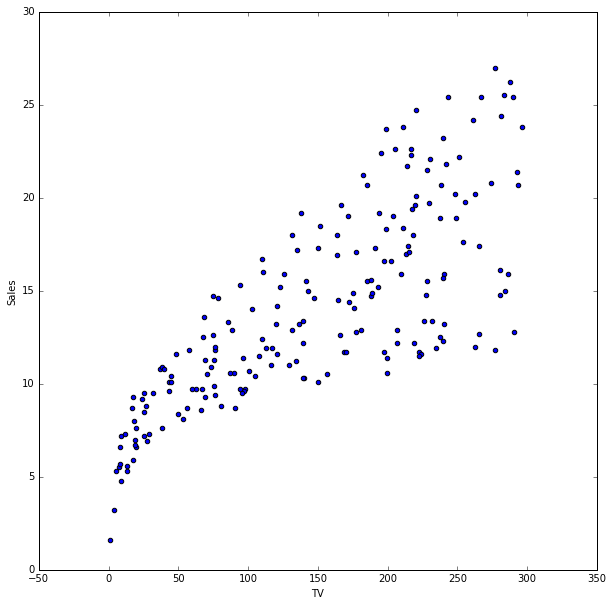

In [25]:
dataset.plot(kind='scatter', x='TV', y='Sales')

Now it's time prepare our data:

1. First, we'll divide our dataset into two parts: one part we're going use to train our linear regression model, and the second we're going to use to evaluate the trained model and if it can generalize well to new unseen data.

3. Second, we'll use the **scale_features** to scale our training and test variables.

In [26]:
dataset_size = len(dataset)
training_size = np.floor(dataset_size * 0.8).astype(int)

# First we split the shuffled dataset into two  parts: training and test
X_training = dataset["TV"][:training_size]
y_training = dataset["Sales"][:training_size]

X_test = dataset["TV"][training_size:]
y_test = dataset["Sales"][training_size:]

# Second we apply feature scaling on X_training and X_test
X_training, training_scalar = scale_features(X_training)
X_test,_ = scale_features(X_test, scalar=training_scalar)

Now we're ready to use the scikit-learn's **SGDRegressor** to build our linear regression model. The procedure simple: we need to construct an instance of **SGDRegressor** then use the **fit** method on that instance to train our model by passing to it our training X and y.

Now, there are many arguments we can use to construct an **SGDRegressor** instance, and we'll go through some of them as we progress in the chapter, but for now we're focus on one argument called *loss*. This argument determines the cost function we're gonna use with our model. As we learned in the videos, we'll be using the Measn Squared Error cost function (aka Least Squard Error cost), and we can specify that in **SGDRegressor** by passing 'squared_loss' as the value of the *loss* argument.

In [27]:
model = SGDRegressor(loss='squared_loss')
model.fit(X_training, y_training)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

Now we have trained our linear regression model. As we know, our hypothesis takes the form $y = w_0 + w_1x$. We can access the value of $w_0$ with **model.intercept_** and the value of $w_1$ with **model.coef_**.

In [28]:
w0 = model.intercept_
w1 = model.coef_

print "Trained model: y = %0.2f + %0.2fx" % (w0, w1)

Trained model: y = 12.19 + 3.65x


To get an idea of how well our model works, we need to try it on some data that it hasn't seen before in the training. Those are of X_test, y_test we seperated before from the training data. We can calculate the mean squared error (MSE) on the test data using the **predict** method of the model to get the predicted y values.

In [29]:
MSE = np.mean((y_test - model.predict(X_test)) ** 2)

print "The Test Data MSE is: %0.3f" % (MSE)

The Test Data MSE is: 13.170


Now, it's a good idea to plot our training data point along side with the regression model line to visualize the estimation. To do that we create a new column in our dataset DataFrame that contains the model's predicted values of sales. We get those using the model's method **predict**. Then we plot the line that represents the model predictions.

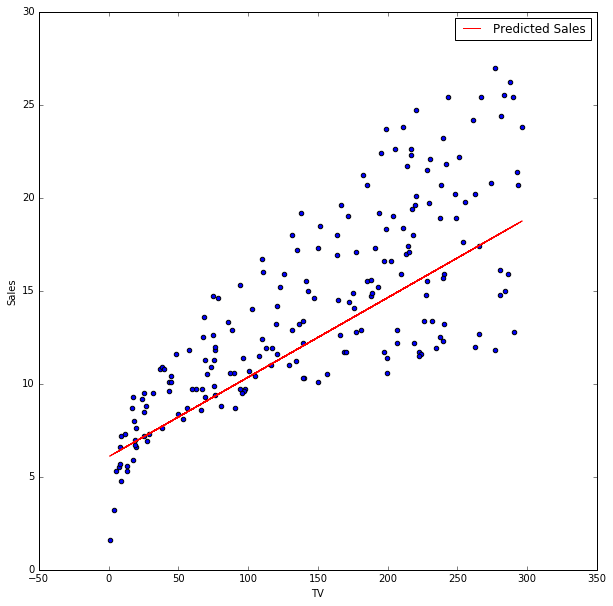

In [30]:
# We create the predicted sales column
scaled_tv,_ = scale_features(dataset["TV"], scalar=training_scalar)
dataset["Predicted Sales"] = model.predict(scaled_tv)

# We then scatter plot our data points as before but we save the resulting plot for later reuse
plot_ax = dataset.plot(kind='scatter', x='TV', y='Sales')

# Then we plot a line with the "Predicted Sales" column
# notice that we resued our prvious plot in the 'ax' argument to draw the line over the scatter points
# we also specify the xlim argument (the range of x axis visible in the plot) to prevent the plot form zooming in
dataset.plot(kind='line', x='TV', y='Predicted Sales', color='red', ax=plot_ax, xlim=(-50, 350))

## Exercise

Try to recreate similar results using the previously elaborated procedure but on the **Radio** data instead of **TV**.